# Health Insurance Cost Prediction

## Lifecycle of Machine Learning Project
* Understanding the problem statement
* Data collection to perform
* Data checks to perform
* Exploratory data analysis
* Data preprocessing
* Model training

## 1) Problem statement
* A number of factors affect the cost of health insurance such as region and age. This project aims to understand how these factors affect cost of health insurance


## 2) Data Collection
* Data source: https://www.kaggle.com/datasets/mirichoi0218/insurance


### 2.1) Data imports

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
df.shape

(1338, 7)

## 3) Data checks to perform
* Check missing values
* Check duplicates
* Check data types
* Check number of unique values for each columns
* Check statistics
* Check various categories of categorical columns

In [22]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### There are no empty values in the dataset

In [25]:
df.duplicated().sum()

1

##### There is one dupliate value in the dataset

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [30]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [32]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### Insights
* The minimum and maximum cost of insurance for this dataset is 1121dols and 63770dols respectively

In [54]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

## 4) EDA

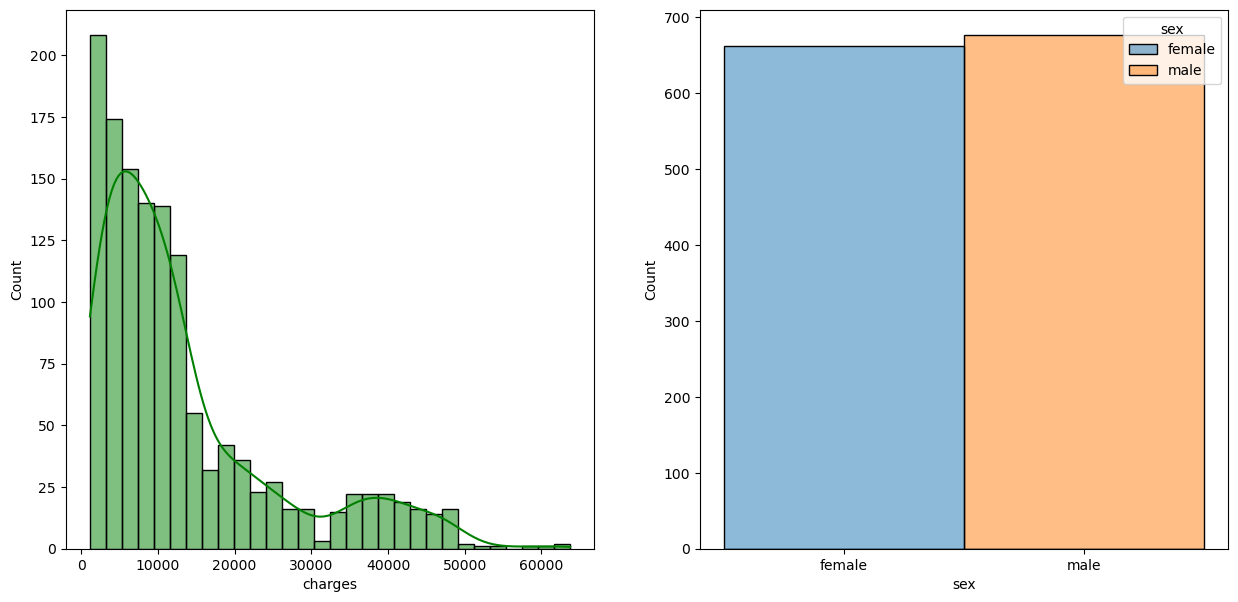

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='charges', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='sex', kde=True, hue='sex')
plt.show()

#### Insights
* Majority of insurance cost is bellow 20,000 dollars
* Number of males paying for health insurance is slightly more than females

### 4.1) Multivariate analysis using pieplot

In [74]:
highest_cost = df[df.charges == df.charges.max()]
highest_cost

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


In [76]:
lowest_cost = df[df.charges == df.charges.min()]
lowest_cost

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.8739


In [ ]:
##### Insights
* The highest insurance was paid by a 54 yearold woman, no children and lives in the southeast
* The lowest insurance was paid by a 18 year old boy, doesnt smoke 

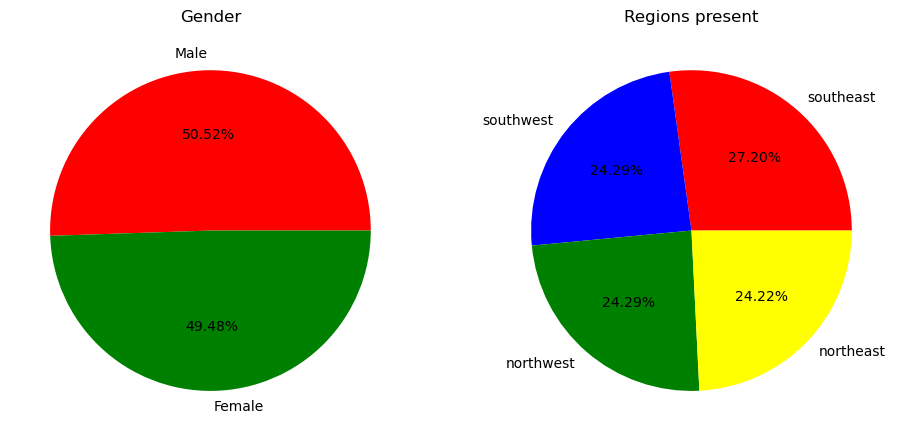

In [60]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['sex'].value_counts()
labels = 'Male', 'Female'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender')
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['region'].value_counts()
labels = 'southeast', 'southwest', 'northwest', 'northeast'
color = ['red', 'blue', 'green', 'yellow']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Regions present')
plt.axis('off')

plt.show()

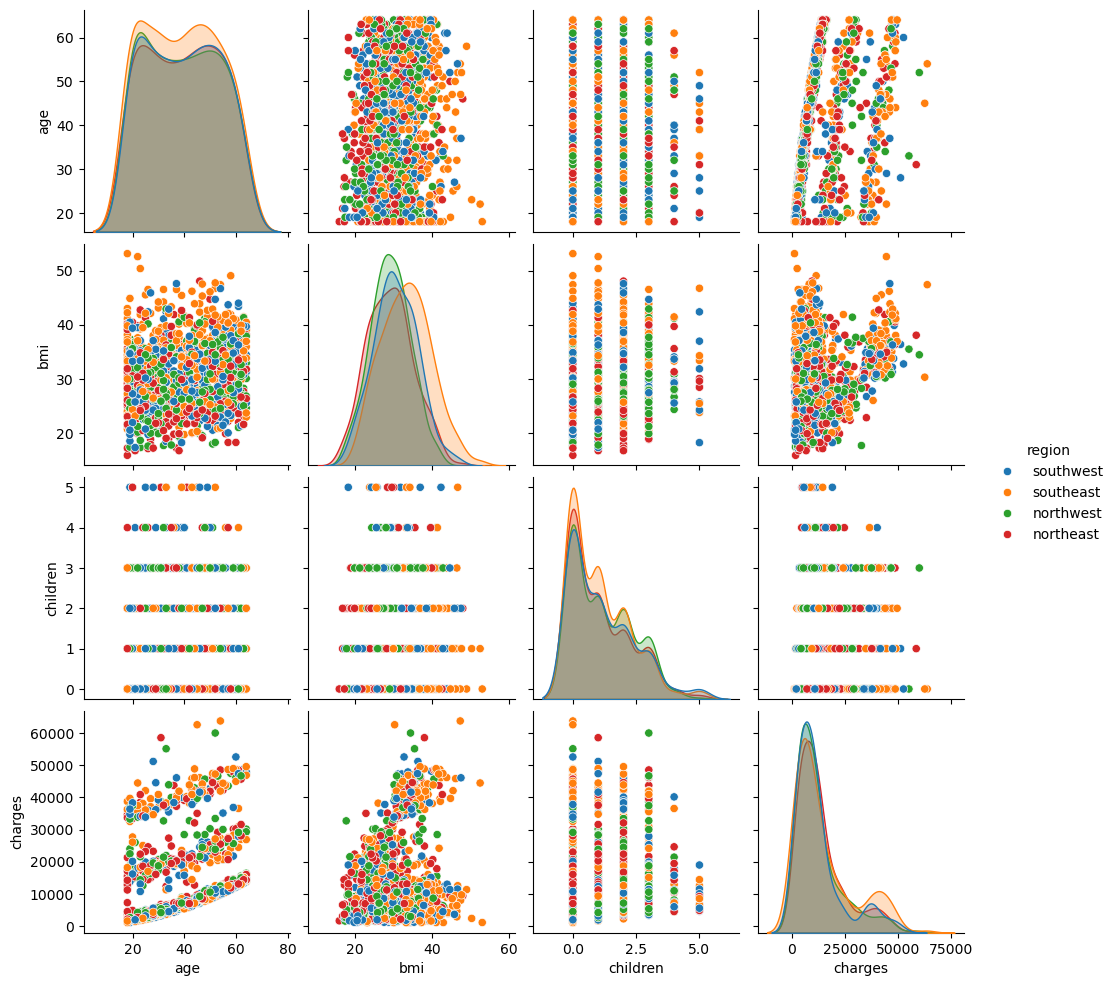

In [62]:
sns.pairplot(df, hue='region')